<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/simple_cnn-GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def try_gpu(e):
    if torch.cuda.is_available():
        return e.cuda()
    return e

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device:', device)

device: cuda


In [3]:
# mini-batch size
nbatch = 100

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=nbatch,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=nbatch,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


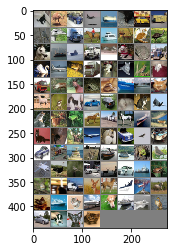

  cat  bird   car plane  ship   cat   car truck  bird  bird truck horse  ship  deer   cat  bird horse  ship  ship truck   cat   dog  frog truck  bird plane  frog truck   cat   cat  bird   dog truck  deer horse  frog   cat  ship  ship   cat horse  bird   dog   car   car   dog   cat plane   cat  deer  frog horse truck horse  ship  deer   cat   cat  deer plane horse   car  bird  ship   car truck  ship  deer  ship  ship  frog  bird plane  bird  bird   car  deer   car  ship  frog  bird   cat truck  deer horse plane plane horse   cat  ship   cat plane   dog  ship  ship  bird   car   dog   dog   cat


In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(nbatch)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)
net = try_gpu(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
nepochs = 20
for epoch in range(nepochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = try_gpu(inputs)
        labels = try_gpu(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.306
[1,   200] loss: 2.303
[1,   300] loss: 2.302
[1,   400] loss: 2.301
[1,   500] loss: 2.298
[2,   100] loss: 2.295
[2,   200] loss: 2.292
[2,   300] loss: 2.285
[2,   400] loss: 2.271
[2,   500] loss: 2.246
[3,   100] loss: 2.200
[3,   200] loss: 2.138
[3,   300] loss: 2.086
[3,   400] loss: 2.033
[3,   500] loss: 2.011
[4,   100] loss: 1.972
[4,   200] loss: 1.947
[4,   300] loss: 1.919
[4,   400] loss: 1.893
[4,   500] loss: 1.892
[5,   100] loss: 1.843
[5,   200] loss: 1.828
[5,   300] loss: 1.796
[5,   400] loss: 1.769
[5,   500] loss: 1.749
[6,   100] loss: 1.710
[6,   200] loss: 1.692
[6,   300] loss: 1.695
[6,   400] loss: 1.668
[6,   500] loss: 1.640
[7,   100] loss: 1.629
[7,   200] loss: 1.623
[7,   300] loss: 1.608
[7,   400] loss: 1.592
[7,   500] loss: 1.581
[8,   100] loss: 1.575
[8,   200] loss: 1.554
[8,   300] loss: 1.552
[8,   400] loss: 1.546
[8,   500] loss: 1.523
[9,   100] loss: 1.505
[9,   200] loss: 1.500
[9,   300] loss: 1.523
[9,   400] 

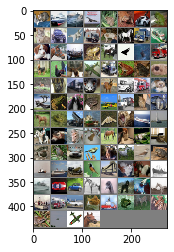

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog  deer   dog truck  bird  deer   car truck   dog  deer  frog   dog  frog plane truck   cat truck horse  frog truck  ship plane   cat  ship  ship horse horse  deer  frog horse   cat  frog   cat  frog  bird   car  bird   cat horse  bird  frog  ship  ship plane  bird truck   cat   cat  ship  ship   car   car horse  bird   dog  bird horse  ship truck plane   cat  ship  frog  deer  frog  frog plane plane horse
Predicted:    horse  ship truck plane  frog  ship  deer plane  frog  ship   car  bird   car truck plane   car   car  ship  frog horse  bird truck horse  bird   cat  ship  frog  ship horse   cat  deer  frog  bird truck plane   cat  bird  deer truck horse  frog horse   cat plane   dog   cat horse  frog  ship horse   cat plane  ship  frog  deer plane horse   cat   dog horse truck   cat 

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(nbatch)))

_, predicted = torch.max(outputs, 1)
print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(nbatch)))

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = try_gpu(images)
        labels = try_gpu(labels)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [10]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = try_gpu(images)
        labels = try_gpu(labels)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(nbatch):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 68 %
Accuracy of  bird : 46 %
Accuracy of   cat : 47 %
Accuracy of  deer : 23 %
Accuracy of   dog : 34 %
Accuracy of  frog : 77 %
Accuracy of horse : 62 %
Accuracy of  ship : 62 %
Accuracy of truck : 61 %
